# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
from glob import glob
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from random import sample
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/train',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory('My_Cars/test',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


## Model

In [3]:
# def modelFunction(filters,kernel_size,strides,pool_size):
#     model = Sequential()

#     #First Layer
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size,padding='same', input_shape=(128, 128, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=pool_size,strides = strides))
#     #model.add(Dropout(0.25))
#     #Second Layer
#     model.add(Conv2D(filters=filters*2, kernel_size=kernel_size, activation='relu'))
#     model.add(MaxPooling2D(pool_size=pool_size,strides = strides))
#     #model.add(Dropout(0.25))
#     #Third Layer
#     model.add(Conv2D(filters=filters*4, kernel_size=kernel_size, activation='relu'))
#     model.add(MaxPooling2D(pool_size=pool_size,strides = strides))
#     model.add(Dropout(0.25))
#     #Fourth Layer
#     # model.add(Conv2D(filters=256, kernel_size=2,padding='same', activation='relu'))
#     # model.add(MaxPooling2D(pool_size=2,strides = 4))
#     #model.add(Dropout(0.25))

#     #model.add(GlobalAveragePooling2D())
#     #Last Layer
#     model.add(Flatten())
#     model.add(Dense(196, activation='softmax'))

#     model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:

filtersList = [32]
kernelList = [5,6]
stridesList = [2]
poolList = [4]
GlobalLoss = 35463548613541
n = 10
for strides in stridesList:
    for pool_size in poolList:
#         print('\r{}/{}'. format(i, n))
         #RandomFilter = random.sample(filtersList,1)
         #RandomKernel = random.sample(kernelList,1)
      #  RandomStrides = random.sample(stridesList,1)
       # RandomPool = random.sample(poolList,1)
         #filters = RandomFilter[0]
         #kernel_size = RandomKernel[0]
      #  strides = RandomStrides[0]
      #  pool_size = RandomPool[0]
        filters = 32
        kernel_size = 6
        print('starting with strides \r{} poolSize/{}'. format(pool_size, strides))



        model = Sequential()

        #First Layer
        model.add(Conv2D(filters=filters, kernel_size=kernel_size,padding='same', input_shape=(128, 128, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=pool_size,strides = strides))
        #model.add(Dropout(0.25))
        #Second Layer
        model.add(Conv2D(filters=filters*2, kernel_size=kernel_size, activation='relu'))
        model.add(MaxPooling2D(pool_size=pool_size,strides = strides))
        #model.add(Dropout(0.25))
        #Third Layer
        model.add(Conv2D(filters=filters*4, kernel_size=kernel_size, activation='relu'))
        model.add(MaxPooling2D(pool_size=pool_size,strides = strides))
        model.add(Dropout(0.25))
        #Fourth Layer
        # model.add(Conv2D(filters=256, kernel_size=2,padding='same', activation='relu'))
        # model.add(MaxPooling2D(pool_size=2,strides = 4))
        #model.add(Dropout(0.25))

        #model.add(GlobalAveragePooling2D())
        #Last Layer
        model.add(Flatten())
        model.add(Dense(196, activation='softmax'))

        model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])










        epochs = 30
        checkpointer = ModelCheckpoint(filepath='RandomSearchResults/weights.best.from_scratch.hdf5', 
                                   verbose=1, save_best_only=True)
        Saving = model.fit_generator(train_data,
              steps_per_epoch=100,  
              epochs=epochs,
              verbose=1, 
              validation_data=test_data,
              validation_steps=100,
              callbacks=[checkpointer])
        LastMinValLoss = np.min(Saving.history['val_loss'])
        if(LastMinValLoss < GlobalLoss):
            GlobalLoss = LastMinValLoss
            #save the best model so far
            model.load_weights('RandomSearchResults/weights.best.from_scratch.hdf5')
            model.save('RandomSearchResults/best_model.h5')
            print('saving new best model, val_loss = {}'.format(LastMinValLoss))
            #save best hyperparameters
            BestFilter = filters
            BestKernel = kernel_size
            BestStrides = strides
            BestPool = pool_size

2 poolSize/2h strides 
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 76s 765ms/step - loss: 5.3903 - acc: 0.0056 - val_loss: 5.2777 - val_acc: 0.0081

Epoch 00001: val_loss improved from inf to 5.27770, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 2/30
100/100 [==============================] - 63s 629ms/step - loss: 5.2716 - acc: 0.0069 - val_loss: 5.2177 - val_acc: 0.0109

Epoch 00002: val_loss improved from 5.27770 to 5.21771, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 3/30
100/100 [==============================] - 59s 589ms/step - loss: 5.2296 - acc: 0.0091 - val_loss: 5.2053 - val_acc: 0.0132

Epoch 00003: val_loss improved from 5.21771 to 5.20535, saving model to RandomSearchResults/

100/100 [==============================] - 59s 590ms/step - loss: 5.1910 - acc: 0.0144 - val_loss: 5.1494 - val_acc: 0.0179

Epoch 00003: val_loss improved from 5.17255 to 5.14945, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 4/30
100/100 [==============================] - 60s 601ms/step - loss: 5.1518 - acc: 0.0147 - val_loss: 5.1385 - val_acc: 0.0112

Epoch 00004: val_loss improved from 5.14945 to 5.13849, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 5/30
100/100 [==============================] - 62s 619ms/step - loss: 5.1403 - acc: 0.0194 - val_loss: 5.1010 - val_acc: 0.0225

Epoch 00005: val_loss improved from 5.13849 to 5.10101, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 6/30
100/100 [==============================] - 61s 610ms/step - loss: 5.1041 - acc: 0.0197 - val_loss: 5.1815 - val_acc: 0.0246

Epoch 00006: val_loss did not improve from 5.10101
Epoch 7/30
100/100 [===========================

100/100 [==============================] - 60s 599ms/step - loss: 5.1000 - acc: 0.0250 - val_loss: 5.1326 - val_acc: 0.0223

Epoch 00009: val_loss did not improve from 5.05979
Epoch 10/30
100/100 [==============================] - 62s 616ms/step - loss: 5.1184 - acc: 0.0169 - val_loss: 5.0361 - val_acc: 0.0272

Epoch 00010: val_loss improved from 5.05979 to 5.03614, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 11/30
100/100 [==============================] - 61s 606ms/step - loss: 5.0555 - acc: 0.0275 - val_loss: 5.0640 - val_acc: 0.0271

Epoch 00011: val_loss did not improve from 5.03614
Epoch 12/30
100/100 [==============================] - 59s 594ms/step - loss: 5.0314 - acc: 0.0244 - val_loss: 5.0628 - val_acc: 0.0284

Epoch 00012: val_loss did not improve from 5.03614
Epoch 13/30
100/100 [==============================] - 58s 583ms/step - loss: 5.0415 - acc: 0.0256 - val_loss: 5.0775 - val_acc: 0.0238

Epoch 00013: val_loss did not improve from 5.03614


100/100 [==============================] - 62s 620ms/step - loss: 4.9768 - acc: 0.0359 - val_loss: 5.0181 - val_acc: 0.0306

Epoch 00017: val_loss did not improve from 5.00018
Epoch 18/30
100/100 [==============================] - 56s 562ms/step - loss: 4.9761 - acc: 0.0266 - val_loss: 5.0140 - val_acc: 0.0328

Epoch 00018: val_loss did not improve from 5.00018
Epoch 19/30
100/100 [==============================] - 59s 588ms/step - loss: 4.9802 - acc: 0.0291 - val_loss: 4.9624 - val_acc: 0.0321

Epoch 00019: val_loss improved from 5.00018 to 4.96240, saving model to RandomSearchResults/weights.best.from_scratch.hdf5
Epoch 20/30
100/100 [==============================] - 56s 559ms/step - loss: 4.9510 - acc: 0.0366 - val_loss: 5.0360 - val_acc: 0.0300

Epoch 00020: val_loss did not improve from 4.96240
Epoch 21/30
100/100 [==============================] - 59s 590ms/step - loss: 4.9397 - acc: 0.0338 - val_loss: 4.9894 - val_acc: 0.0321

Epoch 00021: val_loss did not improve from 4.96240


ValueError: Negative dimension size caused by subtracting 4 from 1 for 'max_pooling2d_15/MaxPool' (op: 'MaxPool') with input shapes: [?,1,1,128].

NameError: name 'vals' is not defined

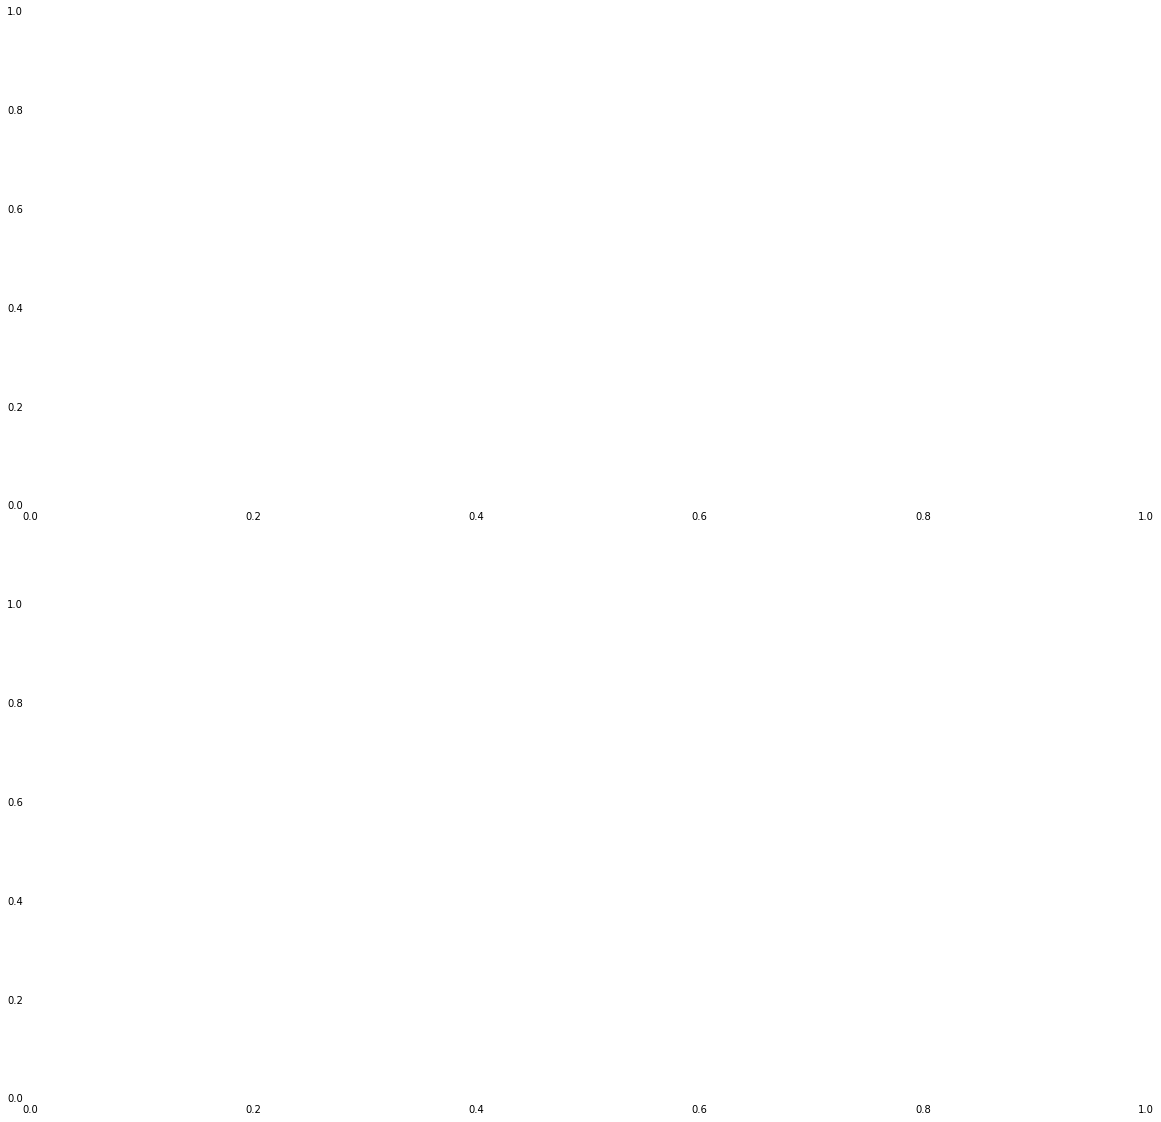

In [5]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])